In [9]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
cv = cv2
from importlib import reload

from utils import *
import utils

reload(utils);

plt.rcParams['figure.figsize'] = [15, 8]

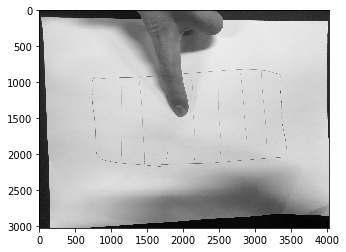

In [7]:
finger, _ = load("../data/images/piano_comp1.jpg")
nofinger, _ = load("../data/images/piano_comp0.jpg")
show(finger);

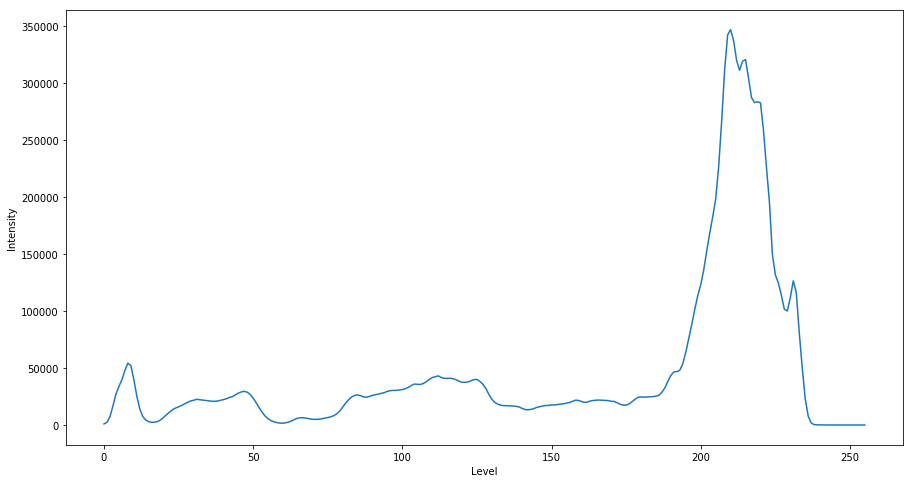

In [10]:
hist_plot(histogram(finger))

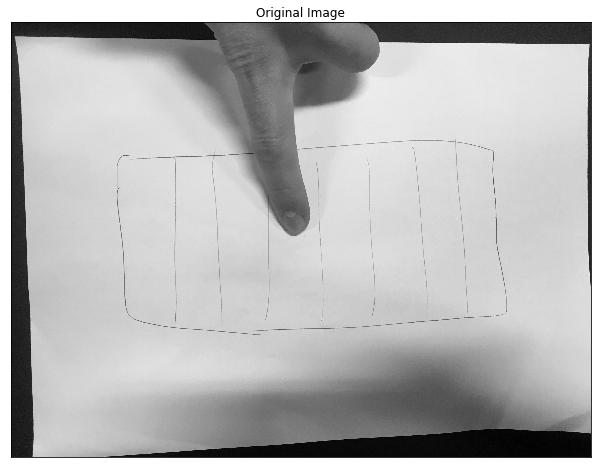

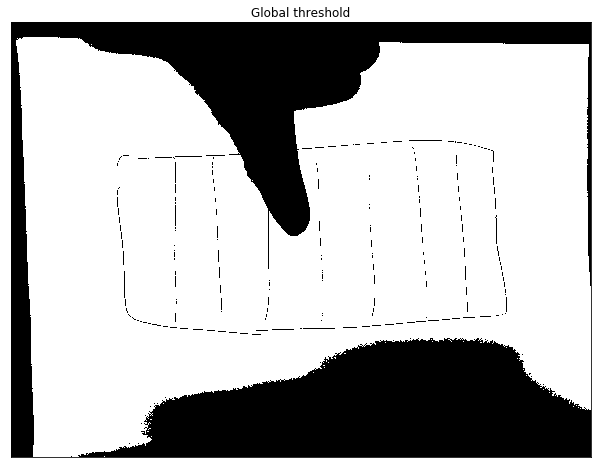

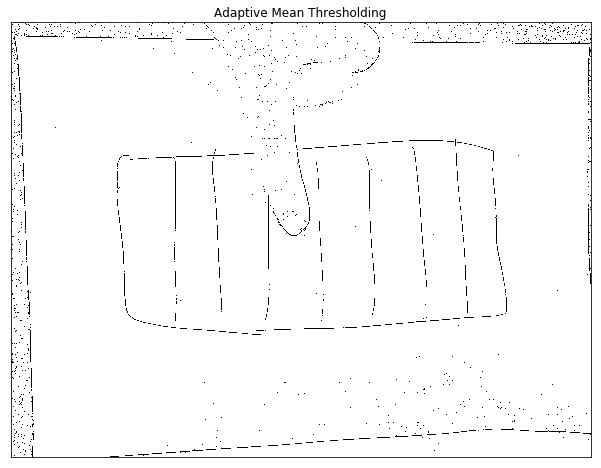

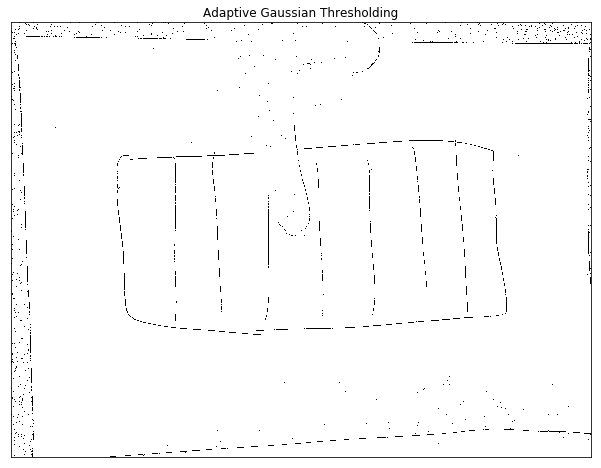

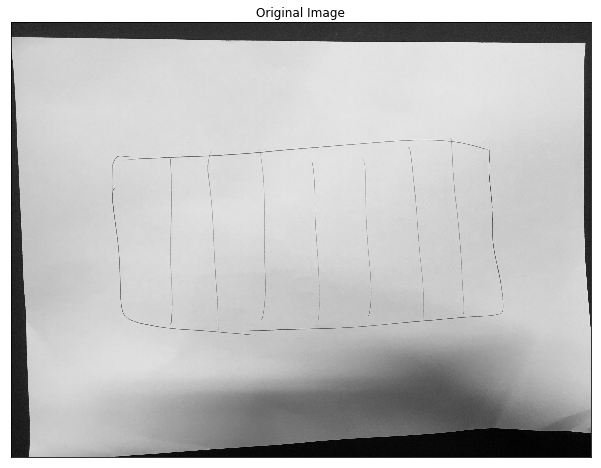

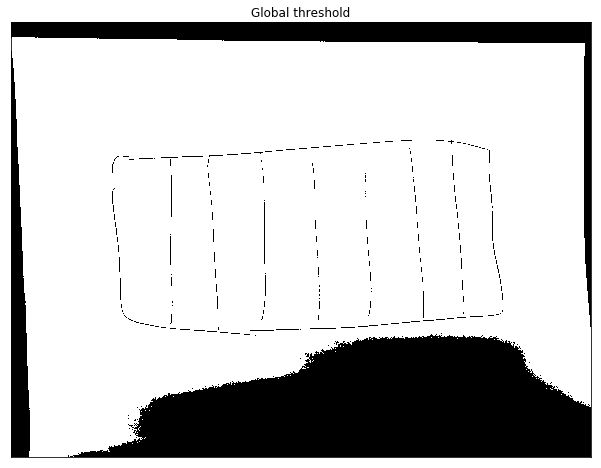

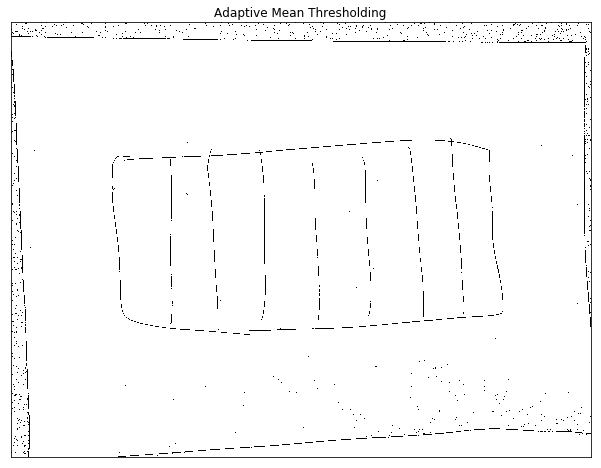

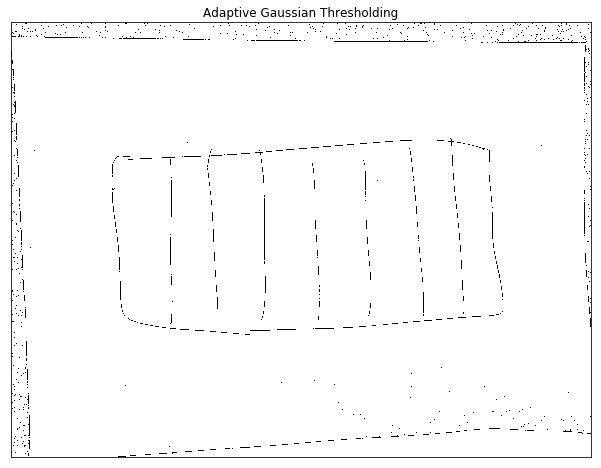

In [11]:
# Segmentation par seuillage
# Comparaison de 3 méthodes : seuillage global, seuillage adaptatif moyen, seuillage adaptatif gaussien
# https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html

def thresh(img, global_thresh=180, mean_c=6, gauss_c=6):
    _, th = cv2.threshold(img, global_thresh, 255, cv2.THRESH_BINARY)
    th_mean = cv2.adaptiveThreshold(
        img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, mean_c
    )
    th_gauss = cv2.adaptiveThreshold(
        img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, gauss_c
    )
    titles = ['Original Image', 'Global threshold', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    images = [img, th, th_mean, th_gauss]
    for i in range(len(images)):
        plt.figure()
        show(images[i])
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

thresh(finger)
thresh(nofinger)

372


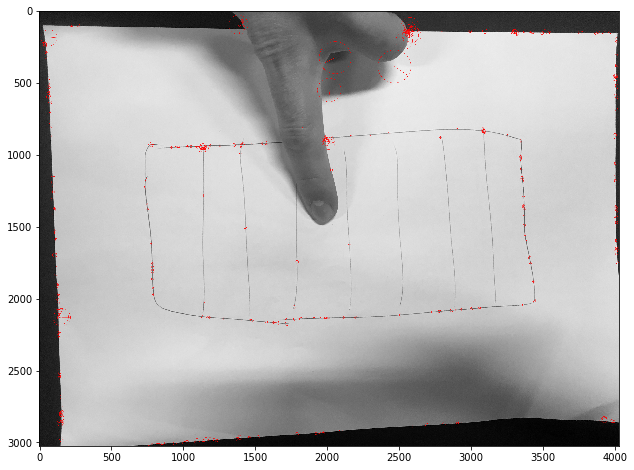

In [15]:
# Détection de points d'intérêts avec SURF
# https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_surf_intro/py_surf_intro.html
# NOTE: SIFT est breveté, et pas inclus dans opencv.
# Nécessite d'installer opencv-contrib-python.

# TODO: use https://www.pyimagesearch.com/2016/04/11/finding-extreme-points-in-contours-with-opencv/
img = finger

surf = cv2.xfeatures2d.SURF_create(1_000)
kp, des = surf.detectAndCompute(img, None)
print(len(kp))
img2 = cv2.drawKeypoints(img, kp, None, (255, 0, 0), 4)
show(img2)